In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
#import data (read mode, as i assume we won't be writing to txt)
data = open('The Data.txt', 'r')

In [38]:
data_arr = data.readlines()
data_list = []
for line in data_arr:
    data_list.append(line.split())
#hardcode method to remove the comments at the top of the text (do we have to use the text file **exactly**? i don't know.
data_list.remove(data_list[0])
data_list.remove(data_list[0])
data_list.remove(data_list[0])
print(data_list)

#if the assignment is what i think it is, we should have a function to turn the time into an integer. will be much better when we graph time vs height.


[['1', '8:07', '6.57'], ['1', '15:37', '-0.39'], ['2', '8:55', '5.38'], ['2', '16:25', '-1.74'], ['3', '9:45', '5.26'], ['3', '17:14', '-1.36'], ['4', '10:35', '4.13'], ['4', '18:00', '-1.15'], ['5', '11:28', '3.48'], ['5', '18:46', '-1.61'], ['6', '12:22', '2.62'], ['6', '19:31', '0.05'], ['7', '13:24', '1.83'], ['7', '20:16', '1.01'], ['8', '3:22', '3.57'], ['8', '21:01', '0.73'], ['9', '4:07', '4.54'], ['9', '21:46', '2.17'], ['10', '4:50', '3.76'], ['10', '11:58', '2.88'], ['11', '5:31', '3.90'], ['11', '12:56', '1.92'], ['12', '6:08', '4.73'], ['12', '13:45', '1.74'], ['13', '6:47', '5.66'], ['13', '14:25', '0.79'], ['14', '7:22', '5.33'], ['14', '15:00', '-0.04'], ['15', '7:59', '5.23'], ['15', '15:34', '-1.12'], ['16', '8:34', '6.67'], ['16', '16:08', '-0.61'], ['17', '9:10', '4.74'], ['17', '16:41', '-0.93'], ['18', '9:45', '4.69'], ['18', '17:12', '-1.29'], ['19', '10:21', '4.20'], ['19', '17:45', '0.22'], ['20', '10:57', '3.68'], ['20', '18:15', '0.26'], ['21', '11:38', '2.47

In [41]:
#converting everything to int.
time_hours = []
height = []

for row in data_list:
    #days hours height
    d = row[0]
    h = row[1]
    height_row = row[2]

    day = int(d)

    #split hours and minutes
    time = h.split(":")
    hours = time[0]
    minutes = time[1]

    #intify
    hour = int(hours)
    minute = int(minutes)
    heights = float(height_row)
    
    time_in_hours = (day - 1) * 24 + hour + minute//60.0
    #this drove me crazy, but i forgot to add a way to combine and pair time and height

    

    time_hours.append(time_in_hours)
    height.append(heights)
    
print(combined)

[(8.0, 6.57), (15.0, -0.39), (32.0, 5.38), (40.0, -1.74), (57.0, 5.26), (65.0, -1.36), (82.0, 4.13), (90.0, -1.15), (107.0, 3.48), (114.0, -1.61), (132.0, 2.62), (139.0, 0.05), (157.0, 1.83), (164.0, 1.01), (171.0, 3.57), (189.0, 0.73), (196.0, 4.54), (213.0, 2.17), (220.0, 3.76), (227.0, 2.88), (245.0, 3.9), (252.0, 1.92), (270.0, 4.73), (277.0, 1.74), (294.0, 5.66), (302.0, 0.79), (319.0, 5.33), (327.0, -0.04), (343.0, 5.23), (351.0, -1.12), (368.0, 6.67), (376.0, -0.61), (393.0, 4.74), (400.0, -0.93), (417.0, 4.69), (425.0, -1.29), (442.0, 4.2), (449.0, 0.22), (466.0, 3.68), (474.0, 0.26), (491.0, 2.47), (498.0, 0.36), (516.0, 2.59), (523.0, 0.99), (530.0, 4.1), (547.0, 1.87), (554.0, 3.17), (572.0, 1.6), (579.0, 3.71), (586.0, 3.1), (604.0, 4.04), (611.0, 2.49), (629.0, 4.07), (636.0, 2.18), (654.0, 5.93), (661.0, 0.7), (679.0, 6.89), (686.0, 0.21), (703.0, 6.72), (711.0, 0.22), (728.0, 6.77), (736.0, -1.68), (753.0, 5.77), (760.0, -1.32), (778.0, 4.35), (785.0, -0.73), (803.0, 4.2

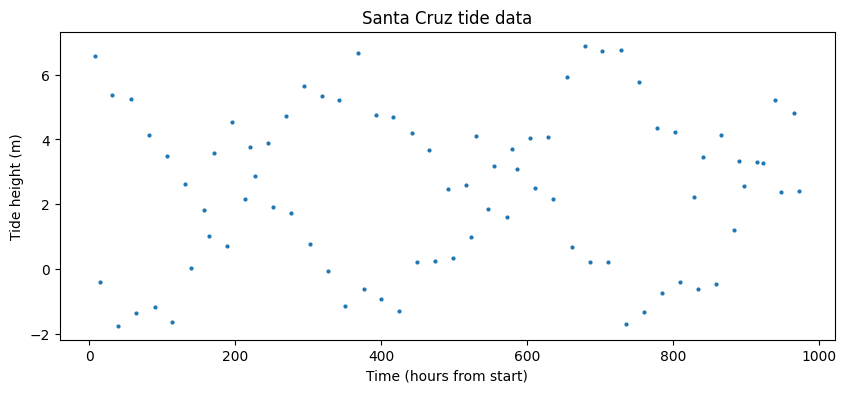

In [42]:
plt.figure(figsize=(10,4))
plt.plot(time_hours, height, '.', markersize=4)
plt.xlabel('Time (hours from start)')
plt.ylabel('Tide height (m)')
plt.title('Santa Cruz tide data')
plt.show()

In [ ]:
#so that's a plot of the tide data. great.


In [ ]:
# Define an oscillatory function to model tidal variations
# For tides, we use a sinusoidal function with the form:
# h(t) = A * sin(2*pi/T * t + phi) + C
# Where:
#   t = time (hours)
#   A = amplitude (feet) - half the distance from high to low tide
#   T = period (hours) - time between successive high tides
#   phi = phase shift (radians) - horizontal shift of the wave
#   C = mean tide height (feet) - vertical offset (average sea level)

def tidal_oscillation(t, A, T, phi, C):
    """
    Calculate tide height at time t using a sinusoidal model.
    
    Parameters:
    -----------
    t : float or array
        Time in hours from start of observations
    A : float
        Amplitude in feet (half the tidal range)
    T : float
        Period in hours (typically ~12.4 hours for semi-diurnal tides)
    phi : float
        Phase shift in radians
    C : float
        Mean tide height in feet
    
    Returns:
    --------
    h : float or array
        Predicted tide height in feet
    """
    h = A * np.sin(2 * np.pi / T * t + phi) + C
    return h